In [1]:
#Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import Data
#from google.colab import files
#uploaded = files.upload()

In [3]:
import pandas as pd
df = pd.read_csv('salary_batting_fielding_pitching_people_2015.csv')
df.head()

,uniqueid,yearid,battingyearid,teamid,lgid,playerid,salary,games,bats,runs,...,namelast,namegiven,weight,height,bats_hand,throws_hand,debut,finalgame,retroid,bbrefid
0,2015OAKabadfe01,2015,2014,OAK,AL,abadfe01,1087500,69,0,0,...,Abad,Fernando Antonio,235,74,L,L,2010-07-28,2021-10-01,abadf001,abadfe01
1,2015CLEadamsau01,2015,2014,CLE,AL,adamsau01,507700,6,0,0,...,Adams,Austin David,205,71,R,R,2014-07-12,2019-07-06,adama001,adamsau01
2,2015SFNaffelje01,2015,2014,SFN,NL,affelje01,6000000,62,0,0,...,Affeldt,Jeremy David,225,76,L,L,2002-04-06,2015-10-04,affej001,affelje01
3,2015MIAalvarhe01,2015,2014,MIA,NL,alvarhe01,4000000,30,57,2,...,Alvarez,Henderson Javier,205,72,R,R,2011-08-10,2017-09-30,alvah001,alvarhe01
4,2015ARIanderch01,2015,2014,ARI,NL,anderch01,512500,22,34,0,...,Anderson,Robert Chase,210,73,R,R,2014-05-11,2021-08-04,andec001,anderch01


In [4]:
df.columns

Index(['uniqueid', 'yearid', 'battingyearid', 'teamid', 'lgid', 'playerid',
       'salary', 'games', 'bats', 'runs', 'hits', 'doubles', 'triples',
       'homeruns', 'rbi', 'stolen_bases', 'caught_stealing', 'walks',
       'batting_strike_outs', 'international_walks', 'hit_by_pitch',
       'sacrifice_bunt', 'sacrifice_flies', 'hit_into_double_plays',
       'fielding_position', 'innouts', 'assists', 'errors', 'double_plays',
       'wins', 'losses', 'shutouts', 'saves', 'innings_pitched_outs',
       'hits_allowed', 'earned_runs', 'homeruns_allowed', 'walks_allowed',
       'pitching_strike_outs', 'baopp', 'era', 'wild_pitches', 'hit_batters',
       'balks', 'batters_facing_pitcher', 'games_finished', 'runs_allowed',
       'sh', 'sf', 'ground_outs_induced_doubleplays', 'birthyear',
       'birthmonth', 'birthday', 'birthcountry', 'birthstate', 'birthcity',
       'deathyear', 'deathmonth', 'deathday', 'deathcountry', 'deathstate',
       'deathcity', 'namefirst', 'namelast', 'name

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

uniqueid         0
yearid           0
battingyearid    0
teamid           0
lgid             0
                ..
throws_hand      0
debut            0
finalgame        0
retroid          0
bbrefid          0
Length: 73, dtype: int64

In [7]:
df = df[['salary','games','fielding_position','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'batting_strike_outs', 'innouts','pitching_strike_outs', 'era', 'wins', 'losses', 'hits_allowed', 'homeruns_allowed', 'walks_allowed','saves', 'weight','height']]
df.columns

Index(['salary', 'games', 'fielding_position', 'bats', 'runs', 'rbi', 'hits',
       'doubles', 'triples', 'homeruns', 'walks', 'batting_strike_outs',
       'innouts', 'pitching_strike_outs', 'era', 'wins', 'losses',
       'hits_allowed', 'homeruns_allowed', 'walks_allowed', 'saves', 'weight',
       'height'],
      dtype='object')

In [8]:
df.isnull().sum()

salary                    0
games                     0
fielding_position         0
bats                      0
runs                      0
rbi                       0
hits                      0
doubles                   0
triples                   0
homeruns                  0
walks                     0
batting_strike_outs       0
innouts                   0
pitching_strike_outs    472
era                     473
wins                    472
losses                  472
hits_allowed            472
homeruns_allowed        472
walks_allowed           472
saves                   472
weight                    0
height                    0
dtype: int64

In [9]:
cleaned_df = df[['salary','games', 'fielding_position','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'batting_strike_outs', 'innouts', 'pitching_strike_outs', 'era', 'wins', 'losses', 'hits_allowed', 'homeruns_allowed', 'walks_allowed','saves', 'weight','height']].fillna(0)

In [10]:
cleaned_df.isnull().sum()

salary                  0
games                   0
fielding_position       0
bats                    0
runs                    0
rbi                     0
hits                    0
doubles                 0
triples                 0
homeruns                0
walks                   0
batting_strike_outs     0
innouts                 0
pitching_strike_outs    0
era                     0
wins                    0
losses                  0
hits_allowed            0
homeruns_allowed        0
walks_allowed           0
saves                   0
weight                  0
height                  0
dtype: int64

In [11]:
y = cleaned_df['salary']
X = cleaned_df[['games', 'fielding_position','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'batting_strike_outs', 'innouts', 'pitching_strike_outs', 'era', 'wins', 'losses', 'hits_allowed', 'homeruns_allowed', 'walks_allowed','saves', 'weight','height']]

In [12]:
print(y.shape)
print(X.shape)

(782,)
(782, 22)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
#Create Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Check R-Squared
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4069585262551648
Testing Score: 0.3205904473218776


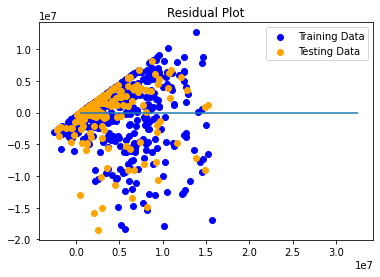

In [17]:
#Residuals
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()